In [1]:
from tools import *
%matplotlib notebook
import pandas as pd

from astropy.coordinates import SkyCoord
from dustmaps.bayestar import BayestarQuery
import astropy.units as u

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [13]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev.csv')
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev_crowding.csv')
data = data.iloc[(data['PDC'].values > 0)]

data['kMeanPSFMag'] = -2.5*np.log10(data['PDC'].values)
data['kMeanPSFMagErr'] = 0.01#(-2.5 / np.log(10)) * (data['PDCe'].values / data['PDC'].values) #0.05#np.abs(data['PDCe'].values) / np.abs(data['PDC'].values)/10
#data = data.iloc[abs(data['kMeanPSFMagErr'].values) < 0.1] 
diff = abs(data['rMeanPSFMag'].values - data['crMeanPSFMag'].values)
ind = diff < 1

data = data.iloc[ind]

ind = ((abs(data['zMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['gMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['rMeanPSFMagErr'].values) < 0.5) & 
       (abs(data['iMeanPSFMagErr'].values) < 0.5))
data = data.iloc[ind]


data = data.iloc[data['campaign'].values==1]


In [14]:
gr = data['gMeanPSFMag'] - data['rMeanPSFMag']
ri = data['rMeanPSFMag'] - data['iMeanPSFMag']
gi = data['gMeanPSFMag'] - data['iMeanPSFMag']

<IPython.core.display.Javascript object>


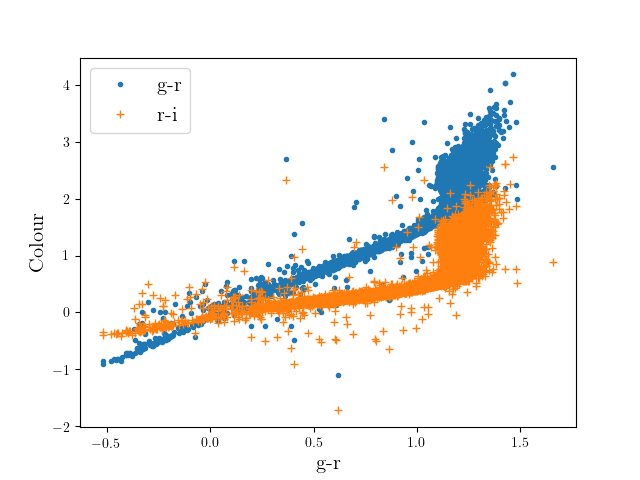

<IPython.core.display.Javascript object>


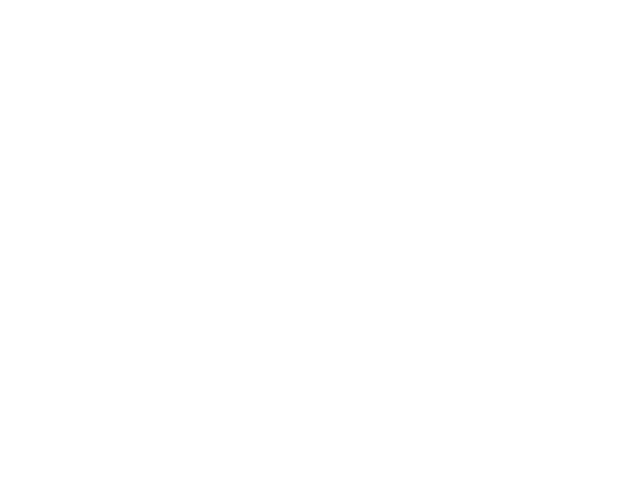

<IPython.core.display.Javascript object>


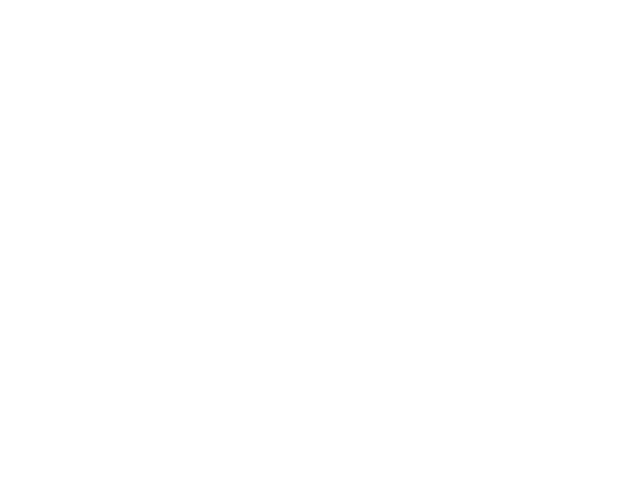

In [22]:
plt.figure()
plt.plot(gr,gi,'.',label='g-r')
plt.plot(gr,ri,'+',label='r-i')
plt.ylabel('Colour',fontsize=15)
plt.xlabel('g-r',fontsize=15)
plt.legend(fontsize=15)
plt.figure('stellar_locus_example.pdf')

<IPython.core.display.Javascript object>


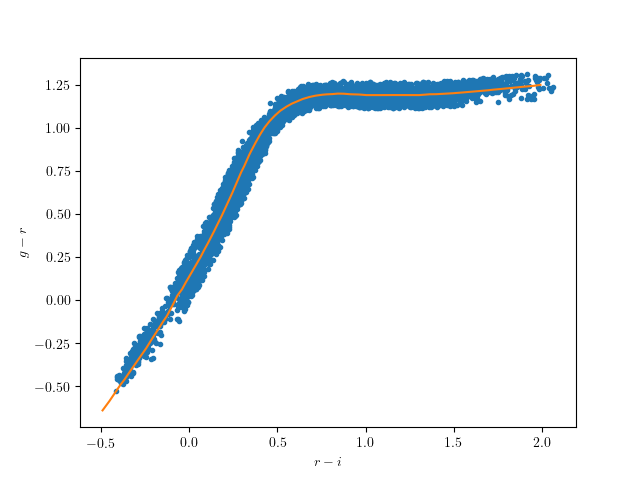

In [11]:
ex, dat = Tonry_reduce(data,plot=True)

<IPython.core.display.Javascript object>


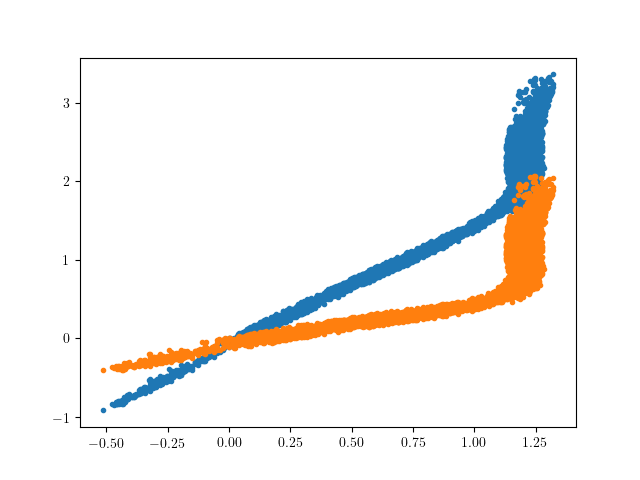

In [12]:
gr = dat['gMeanPSFMag'] - dat['rMeanPSFMag']
ri = dat['rMeanPSFMag'] - dat['iMeanPSFMag']
gi = dat['gMeanPSFMag'] - dat['iMeanPSFMag']

plt.figure()
plt.plot(gr,gi,'.',label='g-r')
plt.plot(gr,ri,'.',label='r-i')